In [18]:
# File: corr_map.ipynb -- Script to Visualize Correlations
# Author: Shomik Jain
# Date: 2/02/2020

In [2]:
import pandas as pd
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
import matplotlib
import seaborn as sns

In [3]:
file = '../data/regression_data.csv'
data = pd.read_csv(file)

In [4]:
data.head()

,year,zipcode,agg_count_log,price_log,person_capacity,review_rating_location,review_length_log,crime_words_perc_old,sentiment_neg_avg,lda2,...,year_2014,year_2015,year_2016,year_2017,listings_count_log,gentrifying,non_gentrifying,higher_income,crime_score_norm,gentrification_score
0,2012,10001,7.453562,5.164220,3.049,9.736,3.467076,0.025792,0.019387,0.184591,...,0,0,0,0,3.737670,0,0,1,0.532557,0.483342
1,2013,10001,7.807917,5.272543,3.120,9.739,3.417120,0.028003,0.018776,0.179155,...,0,0,0,0,3.951244,0,0,1,0.542926,0.481393
2,2014,10001,7.935945,5.320548,3.257,9.658,3.413925,0.030951,0.017506,0.188844,...,1,0,0,0,3.912023,0,0,1,0.503468,0.489998
3,2015,10001,8.485496,5.276312,3.189,9.648,3.320283,0.030951,0.016212,0.175515,...,0,1,0,0,4.262680,0,0,1,0.492122,0.493954
4,2016,10001,8.803274,5.208650,3.135,9.640,3.223529,0.044952,0.018056,0.158692,...,0,0,1,0,4.060443,0,0,1,0.435762,0.508272


In [5]:
data.columns

Index(['year', 'zipcode', 'agg_count_log', 'price_log', 'person_capacity',
       'review_rating_location', 'review_length_log', 'crime_words_perc_old',
       'sentiment_neg_avg', 'lda2', 'lda3', 'lda4', 'lda5', 'lda_pca1',
       'lda_pca2', 'd2v_pca1', 'd2v_pca2', 'crime_score', 'crime_score_log',
       'race_index', 'gini_index', 'edu_bachelors', 'age_25_34',
       'square_feet_log', 'year_2012', 'year_2013', 'year_2014', 'year_2015',
       'year_2016', 'year_2017', 'listings_count_log', 'gentrifying',
       'non_gentrifying', 'higher_income', 'crime_score_norm',
       'gentrification_score'],
      dtype='object')

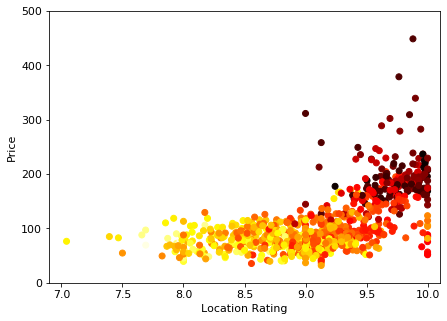

In [6]:
# Price x Review Rating Location

plt.rcParams["figure.figsize"] = [7,5]
fig = plt.figure()

feature_1 = 'price'
feature_2 = 'review_rating_location'

temp = data
temp[feature_1] = np.exp(data[feature_1+'_log'])
#temp = data[data['higher_income']==0]

plt.scatter(temp[feature_2], temp[feature_1], c=1-temp['gentrification_score'], cmap='hot')

plt.xlabel('Location Rating', fontsize=11)
plt.ylabel('Price', fontsize=11)
plt.tick_params(labelsize=11)

plt.xlim(6.9,10.1)
plt.ylim(0, 500)

plt.show()

fig.savefig('metadata_corr.eps', format='eps', dpi=1000)

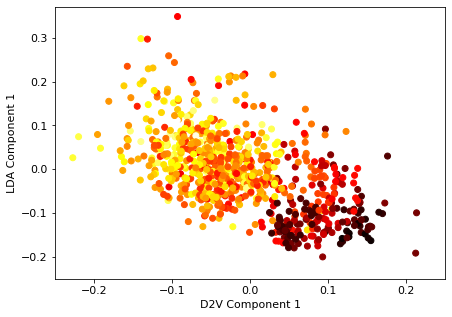

In [8]:
# LDA x D2V Location

plt.rcParams["figure.figsize"] = [7,5]
fig = plt.figure()

feature_1 = 'd2v_pca1'
feature_2 = 'lda_pca1'

plt.scatter(data[feature_1], data[feature_2], c=1-data['gentrification_score'], cmap='hot')

plt.xlabel('D2V Component 1', fontsize=11)
plt.ylabel('LDA Component 1', fontsize=11)
plt.tick_params(labelsize=11)

plt.xlim(-0.25, 0.25)
plt.ylim(-0.25, 0.37)

plt.show()

fig.savefig('text_corr.eps', format='eps', dpi=1000)